### import the relevant libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
airplane_df = pd.read_csv('../airplane_df.csv')

/var/folders/7g/r7tsh7ks1cq18vt2vkdmshh00000gp/T/ipykernel_11012/2838129082.py:5: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  airplane_df = pd.read_csv('../airplane_df.csv')


### show all colums to get a sense of our dataset

In [3]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the DataFrame
print(airplane_df.head())

# Reset the option to its default value

pd.reset_option('display.max_columns')

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20170710X52551           Accident      NYC79AA106  1979-09-17   
1  20020909X01562           Accident      SEA82DA022  1982-01-01   
2  20020909X01561           Accident      NYC82DA015  1982-01-01   
3  20020917X02148           Accident      FTW82FRJ07  1982-01-02   
4  20020917X02134           Accident      FTW82FRA14  1982-01-02   

           Location        Country   Latitude   Longitude Airport.Code  \
0        BOSTON, MA  United States  42.445277  -70.758333          NaN   
1       PULLMAN, WA  United States        NaN         NaN          NaN   
2  EAST HANOVER, NJ  United States        NaN         NaN          N58   
3         HOMER, LA  United States        NaN         NaN          NaN   
4        HEARNE, TX  United States        NaN         NaN          T72   

         Airport.Name Injury.Severity Aircraft.damage Aircraft.Category  \
0                 NaN       Non-Fatal     Substantial          Airplane

### create new colums - necessary for analysis and visualizations

In [5]:
airplane_df['Total.Fatalaties.Injured.And.Uninjured']       = (airplane_df['Total.Fatal.Injuries'] 
                                                               + airplane_df['Total.Serious.Injuries'] 
                                                               + airplane_df['Total.Minor.Injuries']
                                                               + airplane_df['Total.Uninjured'])

airplane_df['Total.Injuries.Fatal.Plus.Nonfatal']           = (airplane_df['Total.Fatal.Injuries'] 
                                                               + airplane_df['Total.Serious.Injuries'] 
                                                               + airplane_df['Total.Minor.Injuries'])

airplane_df['Total.Nonfatal.Injuries']                      = (airplane_df['Total.Serious.Injuries'] 
                                                               + airplane_df['Total.Minor.Injuries'])

airplane_df['Total.Nonfatalities']                          = (airplane_df['Total.Serious.Injuries'] 
                                                               + airplane_df['Total.Minor.Injuries']
                                                               + airplane_df['Total.Uninjured'])

#airplane_df['Proportion.Total.Injuries.To.Total.Uninjured'] = (airplane_df['Total.Injuries.Fatal.Plus.Nonfatal']
#                                                               / airplane_df['Total.Uninjured'])

#airplane_df['Proportion.Fatal.To.Nonfatal.Injuries']        = (airplane_df['Total.Fatal.Injuries']
#                                                               / airplane_df['Total.Nonfatalities'])
                                                               

airplane_df.head()

Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20170710X52551           Accident      NYC79AA106  1979-09-17   
1  20020909X01562           Accident      SEA82DA022  1982-01-01   
2  20020909X01561           Accident      NYC82DA015  1982-01-01   
3  20020917X02148           Accident      FTW82FRJ07  1982-01-02   
4  20020917X02134           Accident      FTW82FRA14  1982-01-02   

           Location        Country   Latitude   Longitude Airport.Code  \
0        BOSTON, MA  United States  42.445277  -70.758333          NaN   
1       PULLMAN, WA  United States        NaN         NaN          NaN   
2  EAST HANOVER, NJ  United States        NaN         NaN          N58   
3         HOMER, LA  United States        NaN         NaN          NaN   
4        HEARNE, TX  United States        NaN         NaN          T72   

         Airport.Name  ... Total.Uninjured Weather.Condition  \
0                 NaN  ...            44.0               VMC   
1  BLACKBURN AG STRIP  ...             2.0               VMC   
2             HANOVER  ...             2.0               IMC   
3                 NaN  ...             0.0               IMC   
4    HEARNE MUNICIPAL  ...             0.0               IMC   

  Broad.phase.of.flight   Report.Status Publication.Date State  \
0                 Climb  Probable Cause       19-09-2017    MA   
1               Takeoff  Probable Cause       01-01-1982    WA   
2               Landing  Probable Cause       01-01-1982    NJ   
3                Cruise  Probable Cause       02-01-1983    LA   
4               Takeoff  Probable Cause       02-01-1983    TX   

  Total.Fatalaties.Injured.And.Uninjured  Total.Injuries.Fatal.Plus.Nonfatal  \
0                                    NaN                                 NaN   
1                                    2.0                                 0.0   
2                                    2.0                                 0.0   
3                                    1.0                                 1.0   
4                                    1.0                                 1.0   

  Total.Nonfatal.Injuries Total.Nonfatalities  
0                     NaN                 NaN  
1                     0.0                 2.0  
2                     0.0                 2.0  
3                     1.0                 1.0  
4                     0.0                 0.0  

[5 rows x 36 columns]

### View new columns preview

In [6]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the DataFrame
print(airplane_df.head())

# Reset the option to its default value

pd.reset_option('display.max_columns')

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20170710X52551           Accident      NYC79AA106  1979-09-17   
1  20020909X01562           Accident      SEA82DA022  1982-01-01   
2  20020909X01561           Accident      NYC82DA015  1982-01-01   
3  20020917X02148           Accident      FTW82FRJ07  1982-01-02   
4  20020917X02134           Accident      FTW82FRA14  1982-01-02   

           Location        Country   Latitude   Longitude Airport.Code  \
0        BOSTON, MA  United States  42.445277  -70.758333          NaN   
1       PULLMAN, WA  United States        NaN         NaN          NaN   
2  EAST HANOVER, NJ  United States        NaN         NaN          N58   
3         HOMER, LA  United States        NaN         NaN          NaN   
4        HEARNE, TX  United States        NaN         NaN          T72   

         Airport.Name Injury.Severity Aircraft.damage Aircraft.Category  \
0                 NaN       Non-Fatal     Substantial          Airplane

### Now start producing graphs to visualize and try to get a sense of our dataset - some graphs useful, some not so much - an iterative process

/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


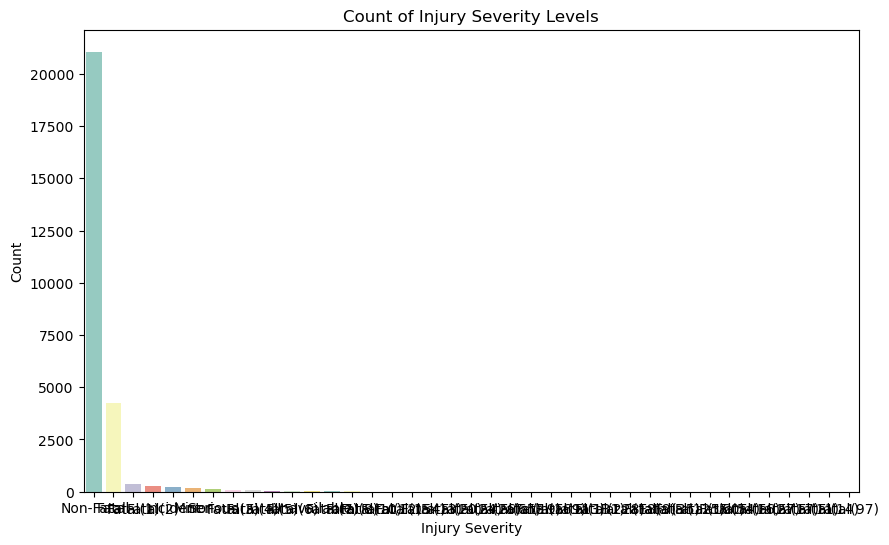

In [7]:
fatal_nonfatal_counts = airplane_df['Injury.Severity'].value_counts()

# Filter out NaN values and consider only rows with known injury severity
fatal_nonfatal_counts = fatal_nonfatal_counts.dropna()


# bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Injury.Severity', data=airplane_df, palette='Set3', order=airplane_df['Injury.Severity'].value_counts().index)
plt.title('Count of Injury Severity Levels')
plt.xlabel('Injury Severity')
plt.ylabel('Count')
plt.show()

/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

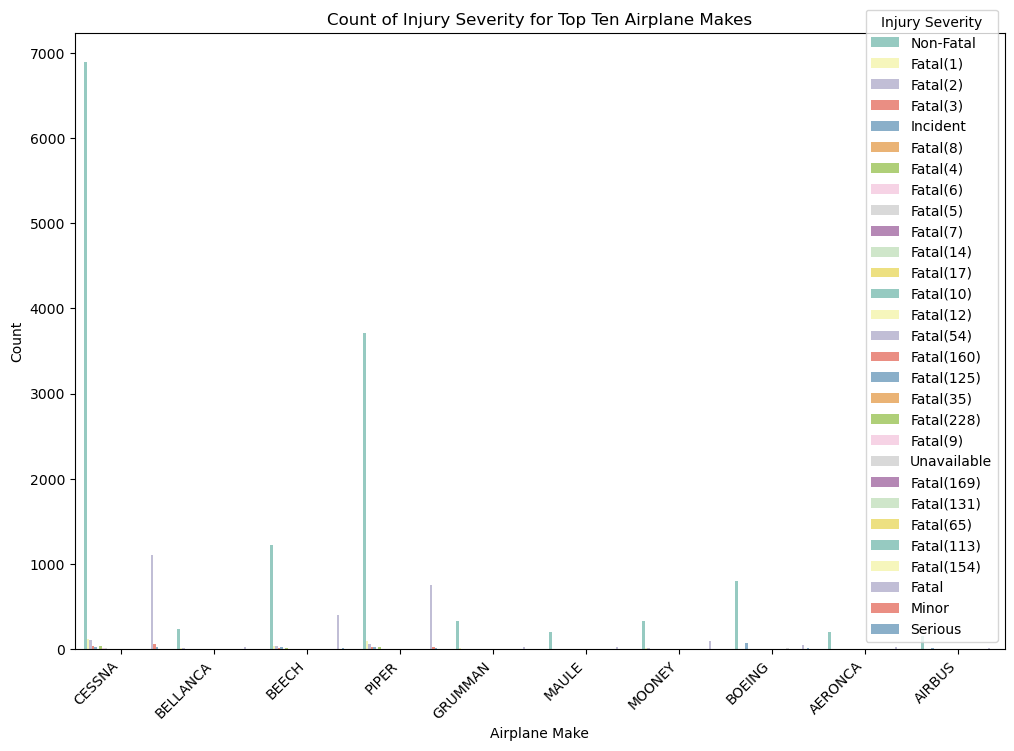

In [10]:
top_ten_makes = airplane_df['Make'].value_counts().nlargest(10).index
df_top_ten_makes = airplane_df[airplane_df['Make'].isin(top_ten_makes)]

# Alternatively, you can use a grouped bar chart
plt.figure(figsize=(12, 8))
sns.countplot(x='Make', hue='Injury.Severity', data=df_top_ten_makes, palette='Set3')
plt.title('Count of Injury Severity for Top Ten Airplane Makes')
plt.xlabel('Airplane Make')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Injury Severity')
plt.show()

/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


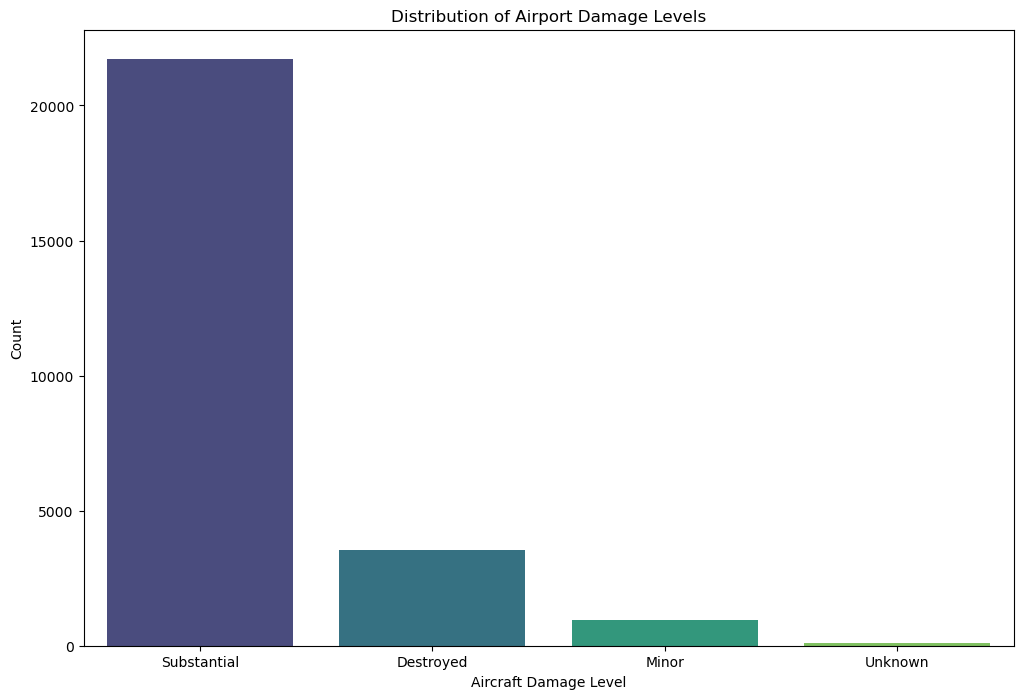

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Aircraft.damage', data=airplane_df, palette='viridis')
plt.title('Distribution of Airport Damage Levels')
plt.xlabel('Aircraft Damage Level')
plt.ylabel('Count')
plt.show()

/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

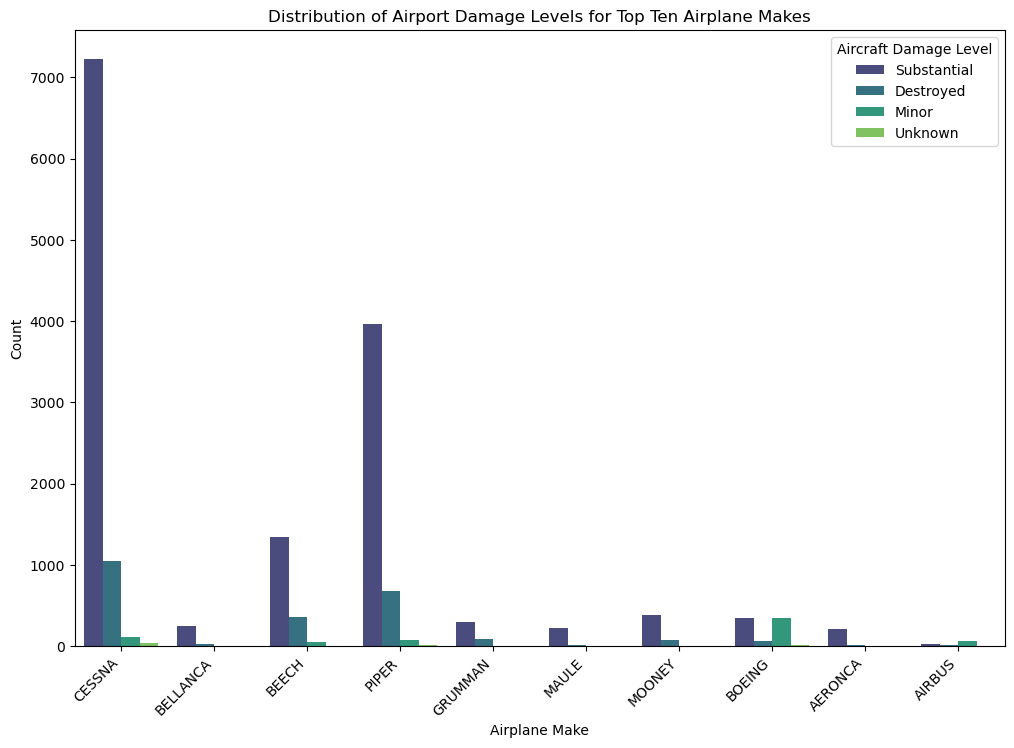

In [13]:
top_ten_makes = airplane_df['Make'].value_counts().nlargest(10).index
df_top_ten_makes = airplane_df[airplane_df['Make'].isin(top_ten_makes)]

plt.figure(figsize=(12, 8))
sns.countplot(x='Make', hue='Aircraft.damage', data=df_top_ten_makes, palette='viridis')
plt.title('Distribution of Airport Damage Levels for Top Ten Airplane Makes')
plt.xlabel('Airplane Make')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Aircraft Damage Level')
plt.show()

/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

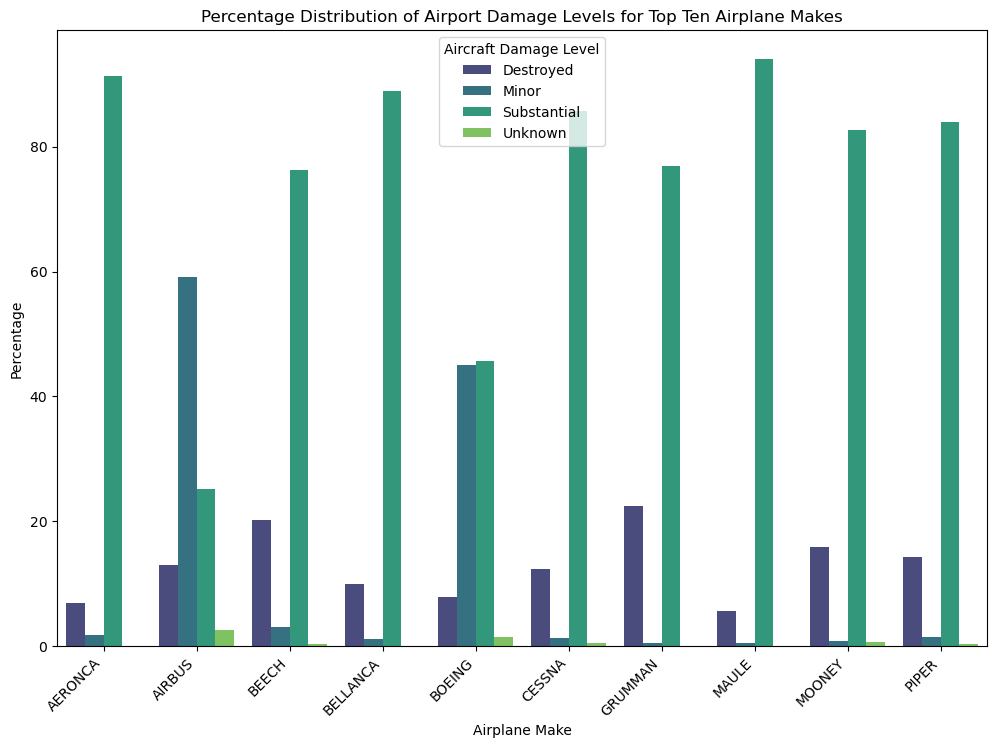

In [14]:
grouped_data = df_top_ten_makes.groupby(['Make', 'Aircraft.damage']).size().reset_index(name='Count')

totals = grouped_data.groupby('Make')['Count'].transform('sum')
grouped_data['Percentage'] = (grouped_data['Count'] / totals) * 100

plt.figure(figsize=(12, 8))
sns.barplot(x='Make', y='Percentage', hue='Aircraft.damage', data=grouped_data, palette='viridis')
plt.title('Percentage Distribution of Airport Damage Levels for Top Ten Airplane Makes')
plt.xlabel('Airplane Make')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Aircraft Damage Level')
plt.show()

/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

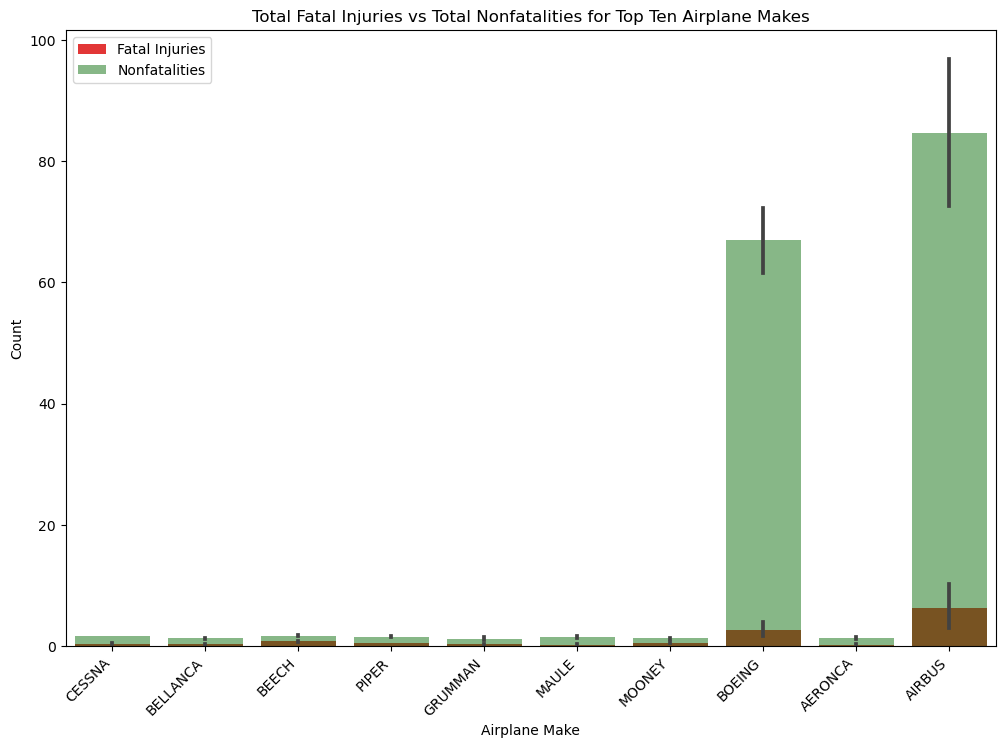

In [15]:
top_ten_makes = airplane_df['Make'].value_counts().nlargest(10).index
df_top_ten_makes = airplane_df[airplane_df['Make'].isin(top_ten_makes)]

# Plotting
plt.figure(figsize=(12, 8))

# Plot fatal injuries as a separate bar
sns.barplot(x='Make', y='Total.Fatal.Injuries', data=df_top_ten_makes, color='red', alpha=0.9, label='Fatal Injuries')
# Plot nonfatalities as a separate bar next to it
sns.barplot(x='Make', y='Total.Nonfatalities', data=df_top_ten_makes, color='green', alpha=0.5, label='Nonfatalities')

plt.title('Total Fatal Injuries vs Total Nonfatalities for Top Ten Airplane Makes')
plt.xlabel('Airplane Make')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

/var/folders/7g/r7tsh7ks1cq18vt2vkdmshh00000gp/T/ipykernel_11012/1204229951.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_ten_makes['Fatality Percentage'] = (df_top_ten_makes['Total.Fatal.Injuries'] / (df_top_ten_makes['Total.Fatal.Injuries'] + df_top_ten_makes['Total.Nonfatalities'])) * 100
/var/folders/7g/r7tsh7ks1cq18vt2vkdmshh00000gp/T/ipykernel_11012/1204229951.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_ten_makes['Nonfatality Percentage'] = 100 - df_top_ten_makes['Fatality 

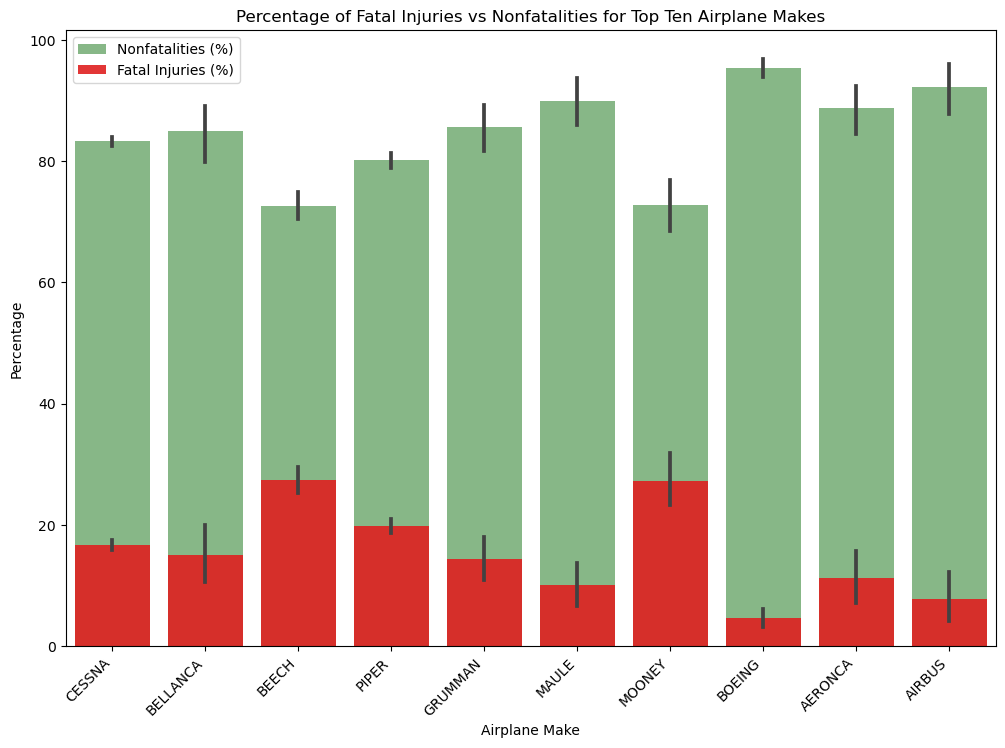

In [16]:
top_ten_makes = airplane_df['Make'].value_counts().nlargest(10).index
df_top_ten_makes = airplane_df[airplane_df['Make'].isin(top_ten_makes)]

# Calculate percentages
df_top_ten_makes['Fatality Percentage'] = (df_top_ten_makes['Total.Fatal.Injuries'] / (df_top_ten_makes['Total.Fatal.Injuries'] + df_top_ten_makes['Total.Nonfatalities'])) * 100
df_top_ten_makes['Nonfatality Percentage'] = 100 - df_top_ten_makes['Fatality Percentage']

plt.figure(figsize=(12, 8))
sns.barplot(x='Make', y='Nonfatality Percentage', data=df_top_ten_makes, color='green',alpha = .5, label='Nonfatalities (%)')
sns.barplot(x='Make', y='Fatality Percentage', data=df_top_ten_makes, color='red', alpha = .9, label='Fatal Injuries (%)')
plt.title('Percentage of Fatal Injuries vs Nonfatalities for Top Ten Airplane Makes')
plt.xlabel('Airplane Make')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

/var/folders/7g/r7tsh7ks1cq18vt2vkdmshh00000gp/T/ipykernel_11012/2700726353.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_ten_makes['Fatality Percentage'] = (df_top_ten_makes['Total.Fatal.Injuries'] / (df_top_ten_makes['Total.Fatal.Injuries'] + df_top_ten_makes['Total.Nonfatalities'])) * 100
/var/folders/7g/r7tsh7ks1cq18vt2vkdmshh00000gp/T/ipykernel_11012/2700726353.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_ten_makes['Nonfatality Percentage'] = 100 - df_top_ten_makes['Fatality 

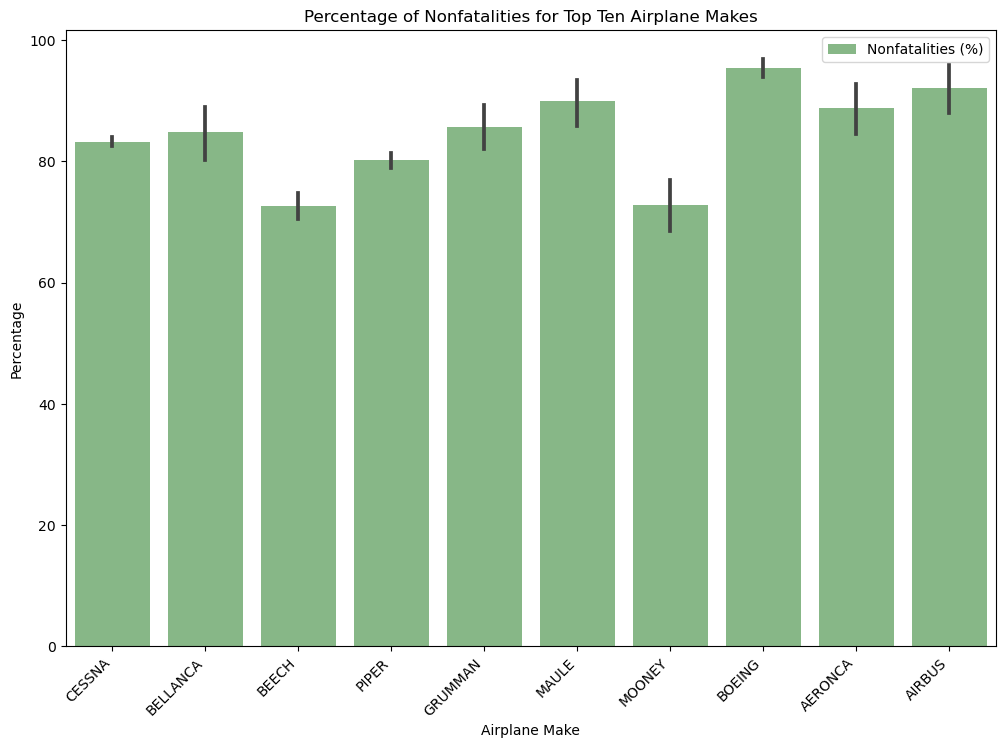

In [17]:
top_ten_makes = airplane_df['Make'].value_counts().nlargest(10).index
df_top_ten_makes = airplane_df[airplane_df['Make'].isin(top_ten_makes)]

# Calculate percentages
df_top_ten_makes['Fatality Percentage'] = (df_top_ten_makes['Total.Fatal.Injuries'] / (df_top_ten_makes['Total.Fatal.Injuries'] + df_top_ten_makes['Total.Nonfatalities'])) * 100
df_top_ten_makes['Nonfatality Percentage'] = 100 - df_top_ten_makes['Fatality Percentage']

plt.figure(figsize=(12, 8))
sns.barplot(x='Make', y='Nonfatality Percentage', data=df_top_ten_makes, color='green',alpha = .5, label='Nonfatalities (%)')
plt.title('Percentage of Nonfatalities for Top Ten Airplane Makes')
plt.xlabel('Airplane Make')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

/var/folders/7g/r7tsh7ks1cq18vt2vkdmshh00000gp/T/ipykernel_11012/3025895537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_ten_makes['Serious Injuries Percentage'] = (df_top_ten_makes['Total.Serious.Injuries'] /
/var/folders/7g/r7tsh7ks1cq18vt2vkdmshh00000gp/T/ipykernel_11012/3025895537.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_ten_makes['Nonfatalities Percentage'] = 100 - df_top_ten_makes['Serious Injuries Percentage']
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packa

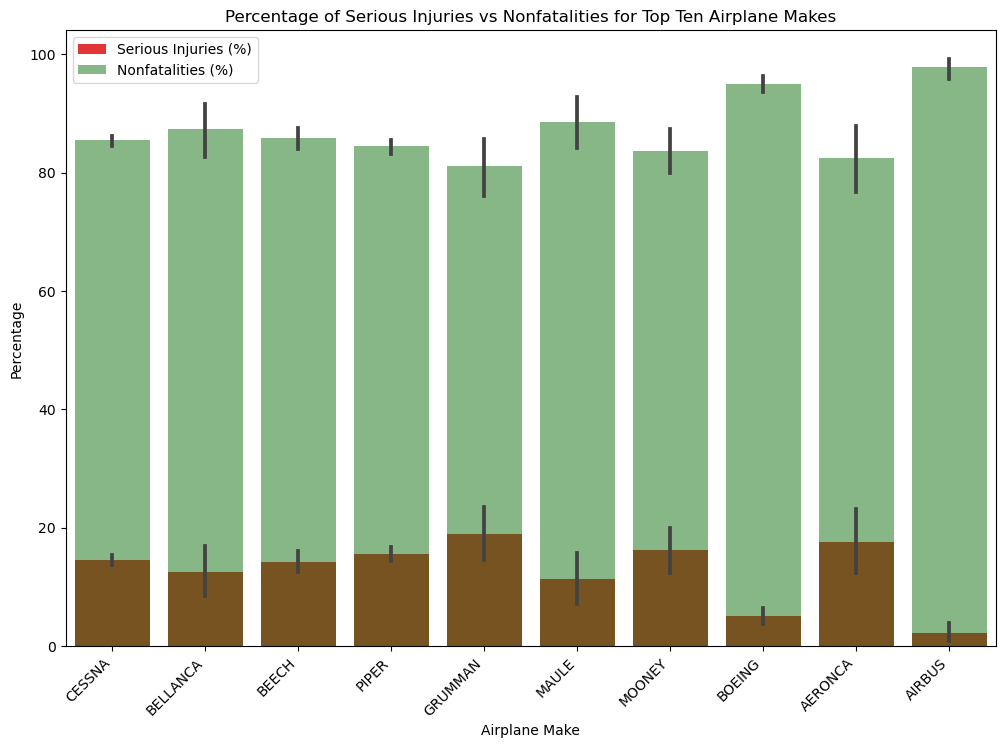

In [19]:
top_ten_makes = airplane_df['Make'].value_counts().nlargest(10).index
df_top_ten_makes = airplane_df[airplane_df['Make'].isin(top_ten_makes)]

# Calculate percentages
df_top_ten_makes['Serious Injuries Percentage'] = (df_top_ten_makes['Total.Serious.Injuries'] / 
                                                     df_top_ten_makes['Total.Nonfatalities']) * 100
df_top_ten_makes['Nonfatalities Percentage'] = 100 - df_top_ten_makes['Serious Injuries Percentage']

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Make', y='Serious Injuries Percentage', data=df_top_ten_makes, color='red', alpha=0.9, label='Serious Injuries (%)')
sns.barplot(x='Make', y='Nonfatalities Percentage', data=df_top_ten_makes, color='green', alpha=0.5, label='Nonfatalities (%)')

plt.title('Percentage of Serious Injuries vs Nonfatalities for Top Ten Airplane Makes')
plt.xlabel('Airplane Make')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [20]:
def print_stats(df, column):    
    print("Mean:              ", df[column].mean())
    print("Median:            ", df[column].median())
    print("Standard Deviation:", df[column].std())
    
print_stats(airplane_df, "Total.Uninjured")

Mean:               6.36714451472845
Median:             1.0
Standard Deviation: 31.849418360423062


/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


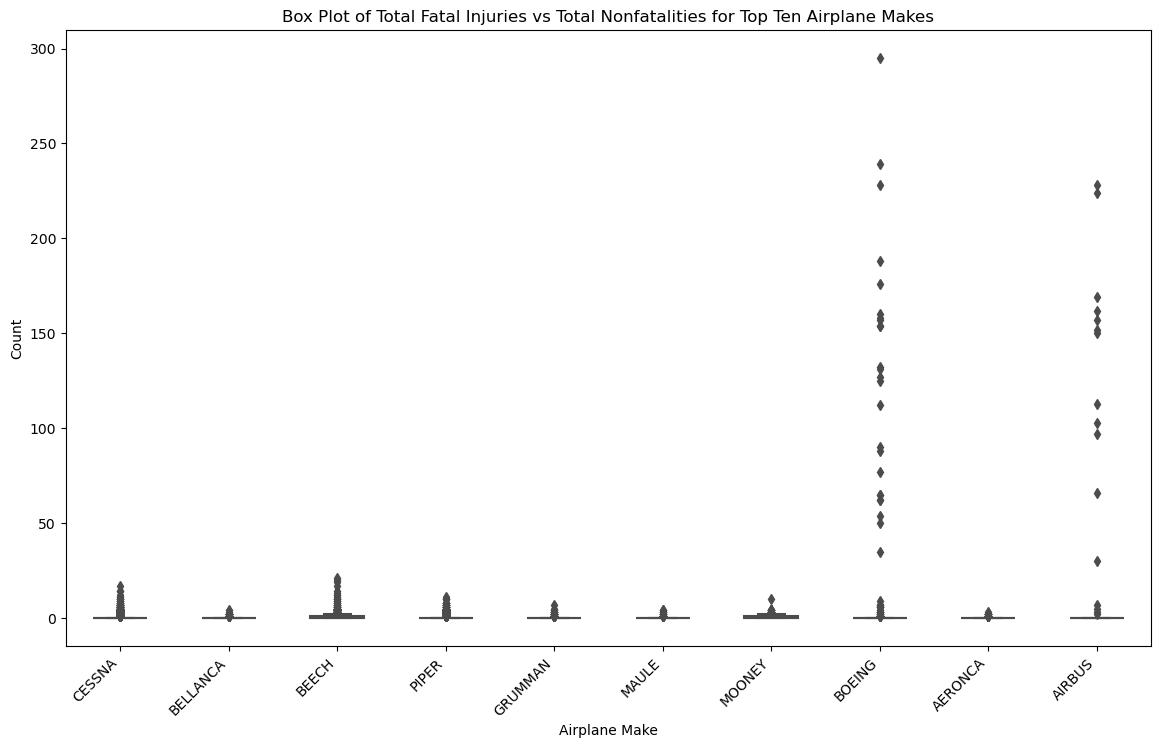

In [21]:
top_ten_makes = airplane_df['Make'].value_counts().nlargest(10).index
df_top_ten_makes = airplane_df[airplane_df['Make'].isin(top_ten_makes)]

# Plotting
plt.figure(figsize=(14, 8))

# Create a box plot for Total.Fatal.Injuries
sns.boxplot(x='Make', y='Total.Fatal.Injuries', data=df_top_ten_makes, color='red', width=0.5)

plt.title('Box Plot of Total Fatal Injuries vs Total Nonfatalities for Top Ten Airplane Makes')
plt.xlabel('Airplane Make')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

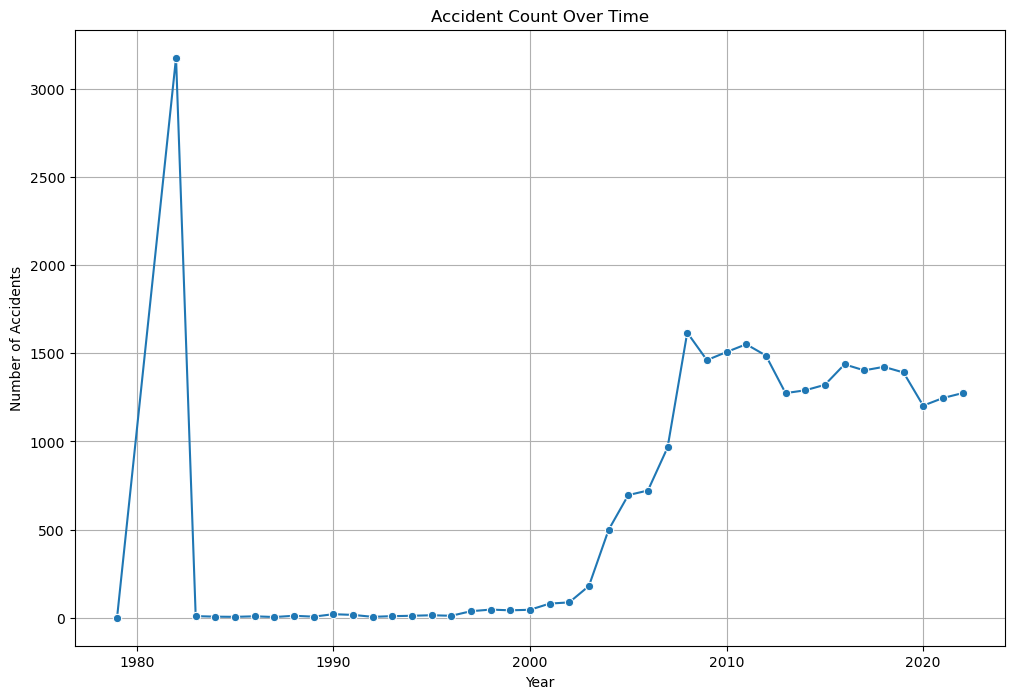

In [22]:
airplane_df['Event.Date'] = pd.to_datetime(airplane_df['Event.Date'])

# Extract year from the 'Event.Date' column
airplane_df['Year'] = airplane_df['Event.Date'].dt.year

# Count the number of accidents per year
accidents_by_year = airplane_df['Year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(x=accidents_by_year.index, y=accidents_by_year.values, marker='o')
plt.title('Accident Count Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


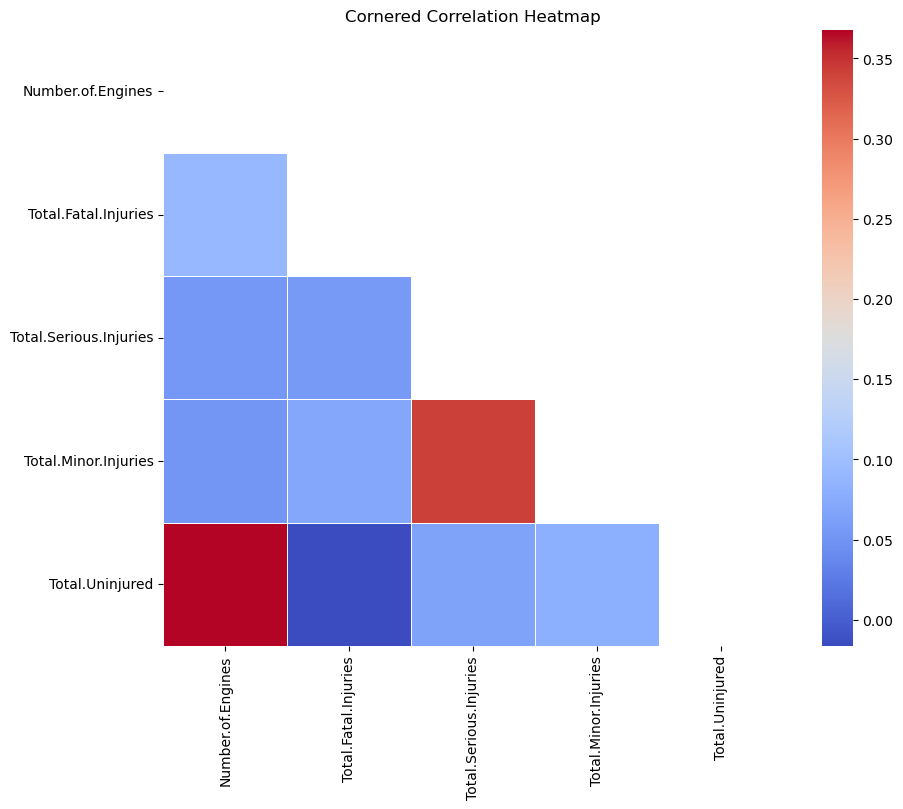

In [23]:
selected_columns = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Create a subset DataFrame with selected columns
correlation_data = airplane_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a mask to hide the upper triangle for a cornered heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Cornered Correlation Heatmap')
plt.show()

### Boolean mask to separate values into pre- and post-1998, will make it easier to view more recent data in Tableau

In [25]:
# Assuming 'Event.Date' is in datetime format. If not, convert it to datetime first.
airplane_df['Event.Date'] = pd.to_datetime(airplane_df['Event.Date'])

# Create a new column 'After_1998' with boolean values
airplane_df['After_1998'] = airplane_df['Event.Date'] > pd.to_datetime('1998-01-01')

# Display the DataFrame with the new column
print(airplane_df[['Event.Date', 'After_1998']])

      Event.Date  After_1998
0     1979-09-17       False
1     1982-01-01       False
2     1982-01-01       False
3     1982-01-02       False
4     1982-01-02       False
...          ...         ...
28851 2022-12-13        True
28852 2022-12-14        True
28853 2022-12-15        True
28854 2022-12-16        True
28855 2022-12-26        True

[28856 rows x 2 columns]


### making colums for Fatality ratio and Nonfatal ratios (it turns out that Tableau can usually represent this information without these colums being necessary)

In [27]:
airplane_df['Fatality Percentage'] = (airplane_df['Total.Fatal.Injuries'] / (airplane_df['Total.Fatal.Injuries'] + airplane_df['Total.Nonfatalities'])) * 100
airplane_df['Nonfatality Percentage'] = 100 - airplane_df['Fatality Percentage']
airplane_df.head()

Event.Id Investigation.Type Accident.Number Event.Date  \
0  20170710X52551           Accident      NYC79AA106 1979-09-17   
1  20020909X01562           Accident      SEA82DA022 1982-01-01   
2  20020909X01561           Accident      NYC82DA015 1982-01-01   
3  20020917X02148           Accident      FTW82FRJ07 1982-01-02   
4  20020917X02134           Accident      FTW82FRA14 1982-01-02   

           Location        Country   Latitude   Longitude Airport.Code  \
0        BOSTON, MA  United States  42.445277  -70.758333          NaN   
1       PULLMAN, WA  United States        NaN         NaN          NaN   
2  EAST HANOVER, NJ  United States        NaN         NaN          N58   
3         HOMER, LA  United States        NaN         NaN          NaN   
4        HEARNE, TX  United States        NaN         NaN          T72   

         Airport.Name  ... Publication.Date State  \
0                 NaN  ...       19-09-2017    MA   
1  BLACKBURN AG STRIP  ...       01-01-1982    WA   
2             HANOVER  ...       01-01-1982    NJ   
3                 NaN  ...       02-01-1983    LA   
4    HEARNE MUNICIPAL  ...       02-01-1983    TX   

  Total.Fatalaties.Injured.And.Uninjured Total.Injuries.Fatal.Plus.Nonfatal  \
0                                    NaN                                NaN   
1                                    2.0                                0.0   
2                                    2.0                                0.0   
3                                    1.0                                1.0   
4                                    1.0                                1.0   

  Total.Nonfatal.Injuries Total.Nonfatalities    Year  After_1998  \
0                     NaN                 NaN  1979.0       False   
1                     0.0                 2.0  1982.0       False   
2                     0.0                 2.0  1982.0       False   
3                     1.0                 1.0  1982.0       False   
4                     0.0                 0.0  1982.0       False   

  Fatality Percentage Nonfatality Percentage  
0                 NaN                    NaN  
1                 0.0                  100.0  
2                 0.0                  100.0  
3                 0.0                  100.0  
4               100.0                    0.0  

[5 rows x 40 columns]

### exporting the updated dataset to a CSV for furthur exploration in Tableau

In [25]:
airplane_df.to_csv('ryan_airplane_df.csv', encoding='UTF-8')

In [26]:
airplane_df.to_csv('ryan_airplane_df_2.csv', index=False)